# 04 - Applied ML

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from operator import itemgetter
from scipy.stats import kstest

from scipy.stats import pareto
from scipy.stats import powerlaw
from scipy.stats import rayleigh

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We load the dataframe, rename the race, married and nodegree variables to printable names and categorize them.

In [87]:
df = pd.read_csv('lalonde.csv', index_col=[0])

df['race'] = 'white'
df.loc[df['black'] == 1, 'race'] = 'black'
df.loc[df['hispan'] == 1, 'race'] = 'hispanic'
df.drop('black', 1, inplace=True)
df.drop('hispan', 1, inplace=True)
df['race'] = df['race'].astype('category')

df['married'] = df['married'].replace({0: 'Not married', 1: 'Married'}).astype('category')
df['nodegree'] = df['nodegree'].replace({0: 'Degree', 1: 'No degree'}).astype('category')

# Question 1

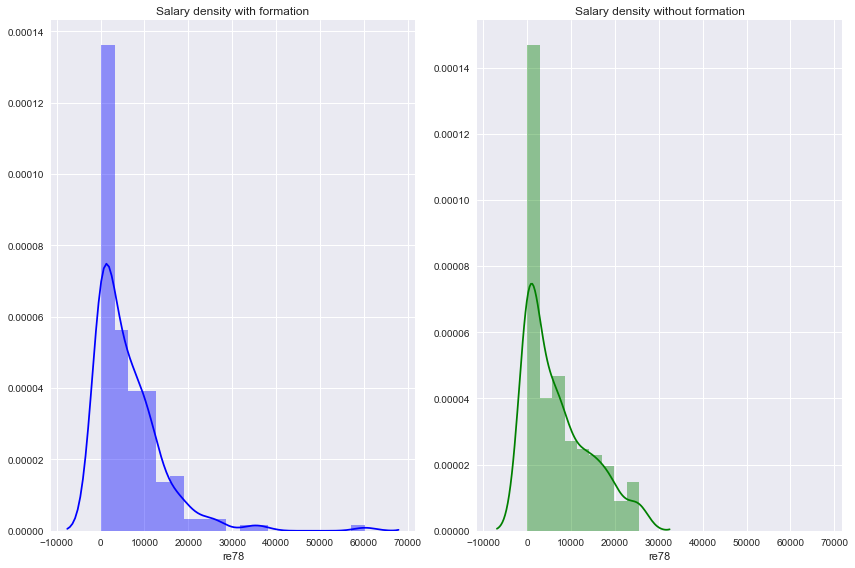

In [5]:
treated_res = df[df['treat'] == 1]['re78']
not_treated_res = df[df['treat'] == 0]['re78']

f, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
ax = axes[0]
ax.set_title("Salary density with formation")
sns.distplot(treated_res, color="b",  ax=ax);
ax = axes[1]
ax.set_title("Salary density without formation")
sns.distplot(not_treated_res, color="g", ax=ax);
plt.tight_layout()

Note about Kolmogorov-Smirnov test: even if very small difference, test will be zero, since test for exact match.
cf. https://stats.stackexchange.com/questions/74434/kolmogorov-smirnov-test-strange-output

I've tried with a lot of different distribution, and none gave me good results.

In [6]:
for n in range(1,5):
    for n2 in range(1, 5):
        print(stats.kstest(treated_res, 'f', [n,n2]))

KstestResult(statistic=0.72247061154971226, pvalue=0.0)
KstestResult(statistic=0.75332374053660534, pvalue=0.0)
KstestResult(statistic=0.75631520981296152, pvalue=0.0)
KstestResult(statistic=0.75668692399293636, pvalue=0.0)
KstestResult(statistic=0.71926741635058788, pvalue=0.0)
KstestResult(statistic=0.75331784777126587, pvalue=0.0)
KstestResult(statistic=0.75638722756771593, pvalue=0.0)
KstestResult(statistic=0.75670977605701406, pvalue=0.0)
KstestResult(statistic=0.71799512279017708, pvalue=0.0)
KstestResult(statistic=0.75331587751440088, pvalue=0.0)
KstestResult(statistic=0.75641475264985236, pvalue=0.0)
KstestResult(statistic=0.75671748675525574, pvalue=0.0)
KstestResult(statistic=0.71731828131037112, pvalue=0.0)
KstestResult(statistic=0.75331489125628437, pvalue=0.0)
KstestResult(statistic=0.7564293783315359, pvalue=0.0)
KstestResult(statistic=0.75672135980945399, pvalue=0.0)


QQplots for trying to match the distribution

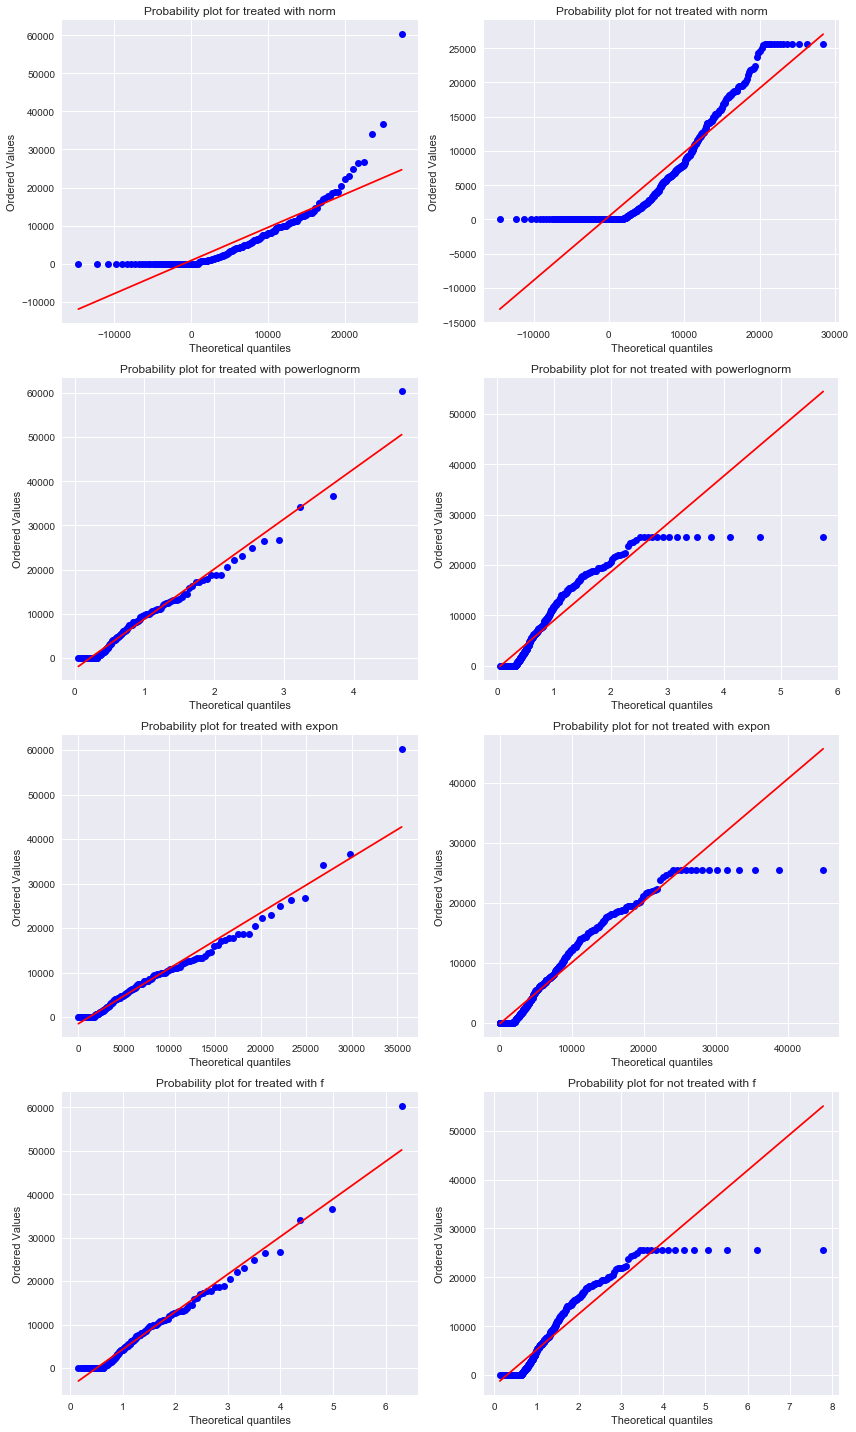

In [9]:
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
dist_names = ['norm', 'powerlognorm', 'expon', 'f']
params_treated = [stats.norm.fit(treated_res), [2, 1], stats.expon.fit(treated_res), [10,10]]
params_not_treated = [stats.norm.fit(not_treated_res), [2, 1], stats.expon.fit(not_treated_res), [10,10]]
# results = []

# for dist in dist_names:
#     res = kstest(not_treated_res, dist, getattr(stats, dist).fit(not_treated_res))
#     results.append((dist, res[1]))
# max(results, key=itemgetter(1))
f, axes = plt.subplots(len(dist_names), 2, figsize=(12, len(dist_names)*5))

for idx, dist in enumerate(dist_names):
    ax = axes[idx, 0]
    stats.probplot(treated_res, dist=dist, sparams=params_treated[idx], plot=ax)
    ax.set_title("Probability plot for treated with " + dist)
    ax = axes[idx, 1]
    stats.probplot(not_treated_res, dist=dist, sparams=params_not_treated[idx], plot=ax)
#   stats.probplot(treated_res, dist=dist, sparams=getattr(stats, dist).fit(treated_res), plot=ax)
    ax.set_title("Probability plot for not treated with " + dist)
plt.tight_layout()

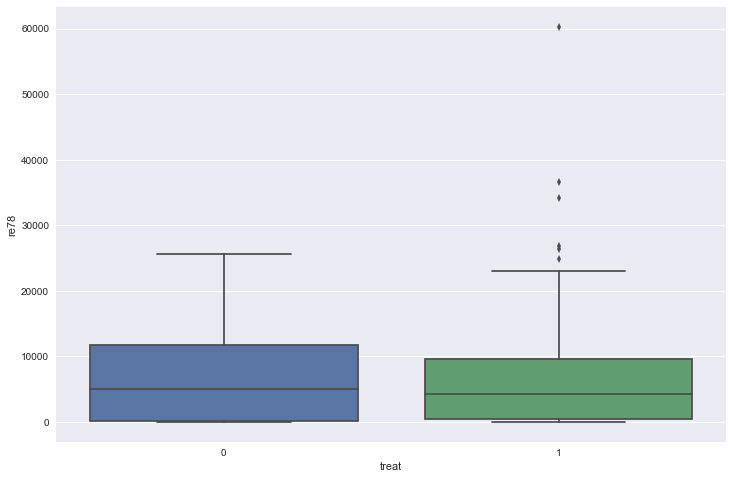

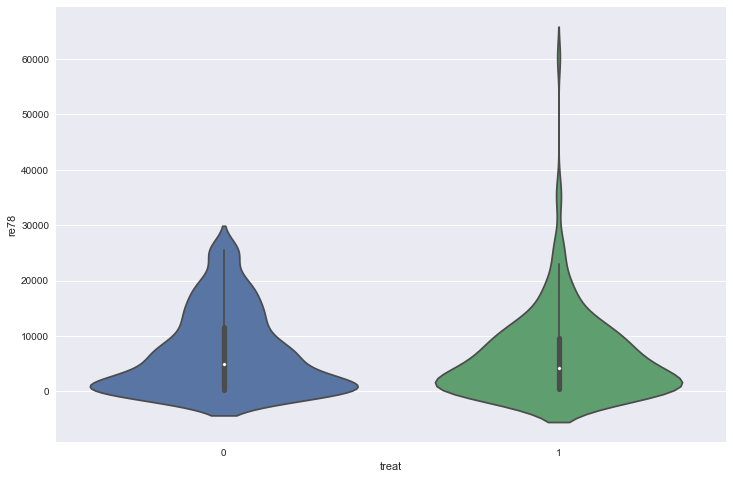

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y='re78',x='treat', data=df, ax=ax);
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(y='re78',x='treat', data=df, ax=ax);

In [21]:
print("Treated salary stats:\n" + treated_res.describe().to_string())
print("\nNot treated salary stats:\n" + not_treated_res.describe().to_string())

Treated salary stats:
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000

Not treated salary stats:
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000


Mean similar, quantile a bit lower, max much lower

# 2

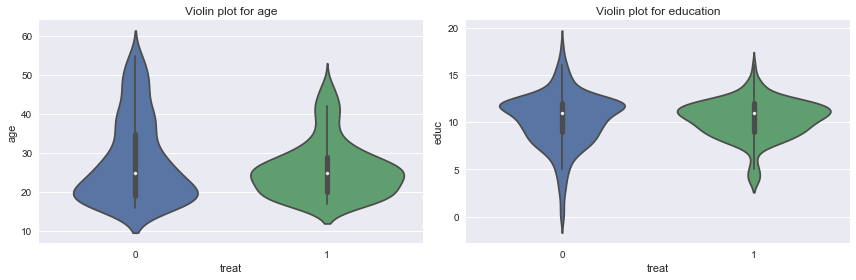

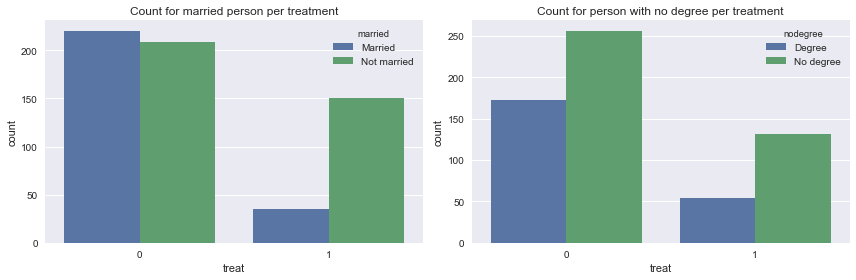

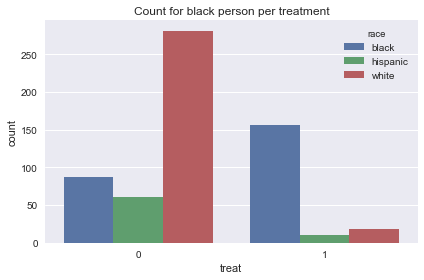

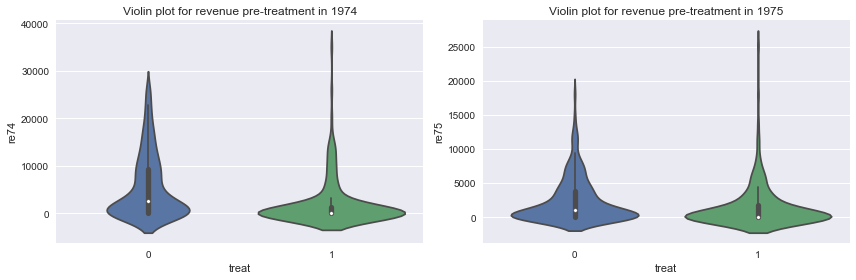

In [70]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].set_title("Violin plot for age")
sns.violinplot(x='treat', y='age', data=df, ax=axes[0])
axes[1].set_title("Violin plot for education")
sns.violinplot(x='treat', y='educ', data=df, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Count for married person per treatment")
sns.countplot(x='treat',hue='married', data=df, ax=axes[0])
axes[1].set_title("Count for person with no degree per treatment")
sns.countplot(x='treat',hue='nodegree', data=df, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.set_title("Count for black person per treatment")
sns.countplot(x='treat',hue='race', data=df, ax=axes)
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Violin plot for revenue pre-treatment in 1974")
sns.violinplot(x='treat', y='re74', data=df, ax=axes[0])
axes[1].set_title("Violin plot for revenue pre-treatment in 1975")
sns.violinplot(x='treat', y='re75', data=df, ax=axes[1])
plt.tight_layout();

# 3

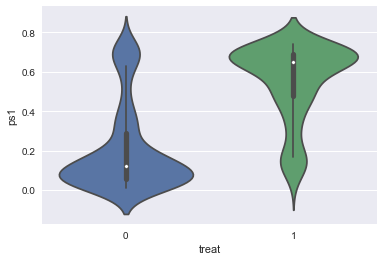

In [186]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
def compute_propensity(data):
    x = pd.get_dummies(data, columns=['race', 'married', 'nodegree']).drop(['treat', 're78'], 1)
    y = data['treat']
    logistic.fit(x,y)
    return logistic.predict_proba(x)[:,1]

propensity = compute_propensity(df)
df_copy = df.copy()
df_copy['ps1'] = propensity
sns.violinplot(x='treat', y='ps1', data=df_copy);

Definitly not well balanced...

# 4

Basic idea: 
Create a graph, where each person is a node, then add an edge between each person from treat and not-treat group which has for weight the absolute difference of propensity.

Then we simply need to apply a min weight matching alorithm on this graph to get the best pairs. Since networkx does not offer a max weight matching, we simply reversed the sign of the weight to get the min weight.


In [368]:
import networkx as nx

propensity = compute_propensity(df)

G = nx.Graph()
data_copy = df.copy()
propensity = pd.Series(propensity, index=data_copy.index)
treated = propensity[df['treat'] == 1]
not_treated = propensity[df['treat'] == 0]

for index_treated, ps_treated in treated.iteritems():
    for index_not_treated, ps_not_treated in not_treated.iteritems():
        propensity_diff = -np.abs(ps_treated - ps_not_treated)
        G.add_edge(index_treated, index_not_treated, weight=propensity_diff)

In [215]:
mate = nx.max_weight_matching(G, True)

In [387]:
matched = df.loc[mate.keys()]

In [367]:
propensity = compute_propensity(df)
data_copy = df.copy()
propensity = pd.Series(propensity, index=data_copy.index)

sum_ = 0
for k, v in mate2.items():
    sum_ += np.abs(propensity.loc[k]-propensity.loc[v])
sum_

62.052158338442254

Other implementation, works better, I do not know why...

We use for a caliper 0.2 * std(logit(propensity)) as suggested in https://www.ncbi.nlm.nih.gov/pubmed/20925139
for algorithm cf. http://onlinelibrary.wiley.com/doi/10.1002/sim.6004/epdf, we implemented greedy nearest neighbor (random) without replacement

In [393]:
from scipy.special import logit
from sklearn.utils import shuffle

def match(data, propensity, seed=1):
    np.random.seed(seed)
    
    caliper = 0.2 * logit(propensity).std()
    data_internal = data.copy()
    data_internal['propensity'] = propensity
    treated = data_internal[data_internal['treat'] == 1]
    not_treated = data_internal[data_internal['treat'] == 0]
    
    matched = treated.copy()
    for idx, propensity in treated['propensity'].iteritems():
        distance = (propensity - not_treated['propensity']).abs()
        print(idx, distance)
        min_index = distance.argmin()
        min_dist = distance.loc[min_index]
        if min_dist < caliper:
            matched.loc[len(matched)] = not_treated.loc[min_index]
            not_treated.drop(min_index)
        else:
            print("No Match")
    return matched

NSW1 id
PSID1      0.425862
PSID2      0.435475
PSID3      0.440420
PSID4      0.434607
PSID5      0.052978
PSID6      0.083188
PSID7      0.431058
PSID8      0.203251
PSID9      0.374376
PSID10     0.425201
PSID11     0.401191
PSID12     0.431599
PSID13     0.392803
PSID14     0.422479
PSID15     0.093646
PSID16     0.231190
PSID17     0.140380
PSID18     0.403996
PSID19     0.398783
PSID20     0.411740
PSID21     0.368192
PSID22     0.296184
PSID23     0.444405
PSID24     0.075814
PSID25     0.437324
PSID26     0.367420
PSID27     0.110597
PSID28     0.357805
PSID29     0.402939
PSID30     0.417922
             ...   
PSID400    0.207411
PSID401    0.249862
PSID402    0.283068
PSID403    0.410451
PSID404    0.344125
PSID405    0.335115
PSID406    0.252655
PSID407    0.325672
PSID408    0.030243
PSID409    0.295465
PSID410    0.366410
PSID411    0.247053
PSID412    0.101884
PSID413    0.374744
PSID414    0.274111
PSID415    0.389561
PSID416    0.164177
PSID417    0.113551
PSID418    0

NSW17 id
PSID1      0.603617
PSID2      0.613229
PSID3      0.618175
PSID4      0.612362
PSID5      0.230733
PSID6      0.260942
PSID7      0.608812
PSID8      0.025497
PSID9      0.552131
PSID10     0.602956
PSID11     0.578946
PSID12     0.609354
PSID13     0.570558
PSID14     0.600234
PSID15     0.084108
PSID16     0.408944
PSID17     0.318135
PSID18     0.581751
PSID19     0.576538
PSID20     0.589494
PSID21     0.545946
PSID22     0.473939
PSID23     0.622160
PSID24     0.253569
PSID25     0.615079
PSID26     0.545175
PSID27     0.288351
PSID28     0.535559
PSID29     0.580693
PSID30     0.595676
             ...   
PSID400    0.029657
PSID401    0.072108
PSID402    0.460823
PSID403    0.588205
PSID404    0.521880
PSID405    0.512869
PSID406    0.074900
PSID407    0.503427
PSID408    0.207998
PSID409    0.473220
PSID410    0.544165
PSID411    0.069299
PSID412    0.075871
PSID413    0.552499
PSID414    0.451866
PSID415    0.567315
PSID416    0.013578
PSID417    0.291306
PSID418    

Name: propensity, Length: 429, dtype: float64
NSW39 id
PSID1      0.422954
PSID2      0.432566
PSID3      0.437512
PSID4      0.431699
PSID5      0.050070
PSID6      0.080279
PSID7      0.428149
PSID8      0.206160
PSID9      0.371468
PSID10     0.422293
PSID11     0.398283
PSID12     0.428691
PSID13     0.389895
PSID14     0.419571
PSID15     0.096555
PSID16     0.228281
PSID17     0.137472
PSID18     0.401088
PSID19     0.395875
PSID20     0.408831
PSID21     0.365283
PSID22     0.293276
PSID23     0.441497
PSID24     0.072906
PSID25     0.434416
PSID26     0.364512
PSID27     0.107688
PSID28     0.354896
PSID29     0.400030
PSID30     0.415013
             ...   
PSID400    0.210320
PSID401    0.252771
PSID402    0.280160
PSID403    0.407542
PSID404    0.341217
PSID405    0.332206
PSID406    0.255563
PSID407    0.322764
PSID408    0.027335
PSID409    0.292557
PSID410    0.363502
PSID411    0.249962
PSID412    0.104792
PSID413    0.371836
PSID414    0.271203
PSID415    0.386652
PSID4

NSW60 id
PSID1      0.116447
PSID2      0.126060
PSID3      0.131006
PSID4      0.125192
PSID5      0.256437
PSID6      0.226227
PSID7      0.121643
PSID8      0.512666
PSID9      0.064961
PSID10     0.115786
PSID11     0.091776
PSID12     0.122185
PSID13     0.083388
PSID14     0.113065
PSID15     0.403061
PSID16     0.078225
PSID17     0.169034
PSID18     0.094581
PSID19     0.089368
PSID20     0.102325
PSID21     0.058777
PSID22     0.013231
PSID23     0.134990
PSID24     0.233601
PSID25     0.127910
PSID26     0.058006
PSID27     0.198818
PSID28     0.048390
PSID29     0.093524
PSID30     0.108507
             ...   
PSID400    0.516826
PSID401    0.559277
PSID402    0.026347
PSID403    0.101036
PSID404    0.034710
PSID405    0.025700
PSID406    0.562070
PSID407    0.016257
PSID408    0.279172
PSID409    0.013950
PSID410    0.056995
PSID411    0.556468
PSID412    0.411299
PSID413    0.065329
PSID414    0.035304
PSID415    0.080146
PSID416    0.473592
PSID417    0.195864
PSID418    

NSW82 id
PSID1      0.639561
PSID2      0.649173
PSID3      0.654119
PSID4      0.648306
PSID5      0.266677
PSID6      0.296886
PSID7      0.644756
PSID8      0.010447
PSID9      0.588075
PSID10     0.638900
PSID11     0.614890
PSID12     0.645298
PSID13     0.606501
PSID14     0.636178
PSID15     0.120052
PSID16     0.444888
PSID17     0.354079
PSID18     0.617695
PSID19     0.612482
PSID20     0.625438
PSID21     0.581890
PSID22     0.509883
PSID23     0.658104
PSID24     0.289513
PSID25     0.651023
PSID26     0.581119
PSID27     0.324295
PSID28     0.571503
PSID29     0.616637
PSID30     0.631620
             ...   
PSID400    0.006287
PSID401    0.036164
PSID402    0.496766
PSID403    0.624149
PSID404    0.557823
PSID405    0.548813
PSID406    0.038957
PSID407    0.539370
PSID408    0.243942
PSID409    0.509164
PSID410    0.580108
PSID411    0.033355
PSID412    0.111815
PSID413    0.588443
PSID414    0.487810
PSID415    0.603259
PSID416    0.049522
PSID417    0.327250
PSID418    

NSW102 id
PSID1      0.649883
PSID2      0.659496
PSID3      0.664441
PSID4      0.658628
PSID5      0.276999
PSID6      0.307208
PSID7      0.655078
PSID8      0.020769
PSID9      0.598397
PSID10     0.649222
PSID11     0.625212
PSID12     0.655620
PSID13     0.616824
PSID14     0.646500
PSID15     0.130374
PSID16     0.455210
PSID17     0.364401
PSID18     0.628017
PSID19     0.622804
PSID20     0.635760
PSID21     0.592213
PSID22     0.520205
PSID23     0.668426
PSID24     0.299835
PSID25     0.661345
PSID26     0.591441
PSID27     0.334617
PSID28     0.581826
PSID29     0.626959
PSID30     0.641942
             ...   
PSID400    0.016609
PSID401    0.025841
PSID402    0.507089
PSID403    0.634471
PSID404    0.568146
PSID405    0.559135
PSID406    0.028634
PSID407    0.549693
PSID408    0.254264
PSID409    0.519486
PSID410    0.590431
PSID411    0.023033
PSID412    0.122137
PSID413    0.598765
PSID414    0.498132
PSID415    0.613582
PSID416    0.059844
PSID417    0.337572
PSID418   

Name: propensity, Length: 429, dtype: float64
NSW124 id
PSID1      0.001881
PSID2      0.011493
PSID3      0.016439
PSID4      0.010626
PSID5      0.371003
PSID6      0.340794
PSID7      0.007076
PSID8      0.627233
PSID9      0.049605
PSID10     0.001220
PSID11     0.022790
PSID12     0.007618
PSID13     0.031178
PSID14     0.001502
PSID15     0.517628
PSID16     0.192792
PSID17     0.283601
PSID18     0.019985
PSID19     0.025198
PSID20     0.012242
PSID21     0.055790
PSID22     0.127797
PSID23     0.020424
PSID24     0.348167
PSID25     0.013343
PSID26     0.056561
PSID27     0.313385
PSID28     0.066177
PSID29     0.021043
PSID30     0.006060
             ...   
PSID400    0.631393
PSID401    0.673844
PSID402    0.140914
PSID403    0.013531
PSID404    0.079857
PSID405    0.088867
PSID406    0.676637
PSID407    0.098310
PSID408    0.393738
PSID409    0.128516
PSID410    0.057572
PSID411    0.671035
PSID412    0.525865
PSID413    0.049237
PSID414    0.149870
PSID415    0.034421
PSID

NSW139 id
PSID1      0.449420
PSID2      0.459033
PSID3      0.463978
PSID4      0.458165
PSID5      0.076536
PSID6      0.106745
PSID7      0.454616
PSID8      0.179693
PSID9      0.397934
PSID10     0.448759
PSID11     0.424749
PSID12     0.455157
PSID13     0.416361
PSID14     0.446037
PSID15     0.070089
PSID16     0.254748
PSID17     0.163938
PSID18     0.427554
PSID19     0.422341
PSID20     0.435298
PSID21     0.391750
PSID22     0.319742
PSID23     0.467963
PSID24     0.099372
PSID25     0.460882
PSID26     0.390978
PSID27     0.134155
PSID28     0.381363
PSID29     0.426497
PSID30     0.441480
             ...   
PSID400    0.183853
PSID401    0.226304
PSID402    0.306626
PSID403    0.434009
PSID404    0.367683
PSID405    0.358672
PSID406    0.229097
PSID407    0.349230
PSID408    0.053801
PSID409    0.319023
PSID410    0.389968
PSID411    0.223495
PSID412    0.078326
PSID413    0.398302
PSID414    0.297669
PSID415    0.413119
PSID416    0.140619
PSID417    0.137109
PSID418   

Name: propensity, Length: 429, dtype: float64
NSW155 id
PSID1      0.455705
PSID2      0.465317
PSID3      0.470263
PSID4      0.464450
PSID5      0.082821
PSID6      0.113030
PSID7      0.460900
PSID8      0.173409
PSID9      0.404219
PSID10     0.455044
PSID11     0.431034
PSID12     0.461442
PSID13     0.422645
PSID14     0.452322
PSID15     0.063804
PSID16     0.261032
PSID17     0.170223
PSID18     0.433839
PSID19     0.428626
PSID20     0.441582
PSID21     0.398034
PSID22     0.326027
PSID23     0.474248
PSID24     0.105657
PSID25     0.467167
PSID26     0.397263
PSID27     0.140439
PSID28     0.387647
PSID29     0.432781
PSID30     0.447764
             ...   
PSID400    0.177569
PSID401    0.220020
PSID402    0.312910
PSID403    0.440293
PSID404    0.373967
PSID405    0.364957
PSID406    0.222813
PSID407    0.355514
PSID408    0.060086
PSID409    0.325308
PSID410    0.396252
PSID411    0.217211
PSID412    0.072041
PSID413    0.404587
PSID414    0.303954
PSID415    0.419403
PSID

NSW171 id
PSID1      0.702049
PSID2      0.711661
PSID3      0.716607
PSID4      0.710794
PSID5      0.329165
PSID6      0.359374
PSID7      0.707244
PSID8      0.072935
PSID9      0.650563
PSID10     0.701388
PSID11     0.677378
PSID12     0.707786
PSID13     0.668990
PSID14     0.698666
PSID15     0.182540
PSID16     0.507376
PSID17     0.416567
PSID18     0.680183
PSID19     0.674970
PSID20     0.687926
PSID21     0.644378
PSID22     0.572371
PSID23     0.720592
PSID24     0.352001
PSID25     0.713511
PSID26     0.643607
PSID27     0.386783
PSID28     0.633991
PSID29     0.679125
PSID30     0.694108
             ...   
PSID400    0.068775
PSID401    0.026324
PSID402    0.559255
PSID403    0.686637
PSID404    0.620311
PSID405    0.611301
PSID406    0.023531
PSID407    0.601858
PSID408    0.306430
PSID409    0.571652
PSID410    0.642596
PSID411    0.029133
PSID412    0.174303
PSID413    0.650931
PSID414    0.550298
PSID415    0.665747
PSID416    0.112010
PSID417    0.389738
PSID418   

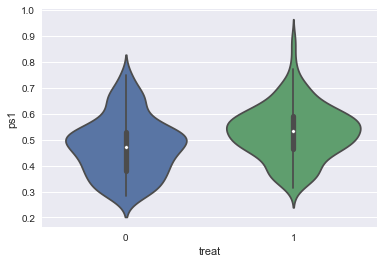

In [394]:
propensity = compute_propensity(df)
matched = match(df, propensity)
propensity = compute_propensity(matched)
matched['ps1'] = propensity
sns.violinplot(x='treat', y='ps1', data=matched);

Much better, median closer, shape closer

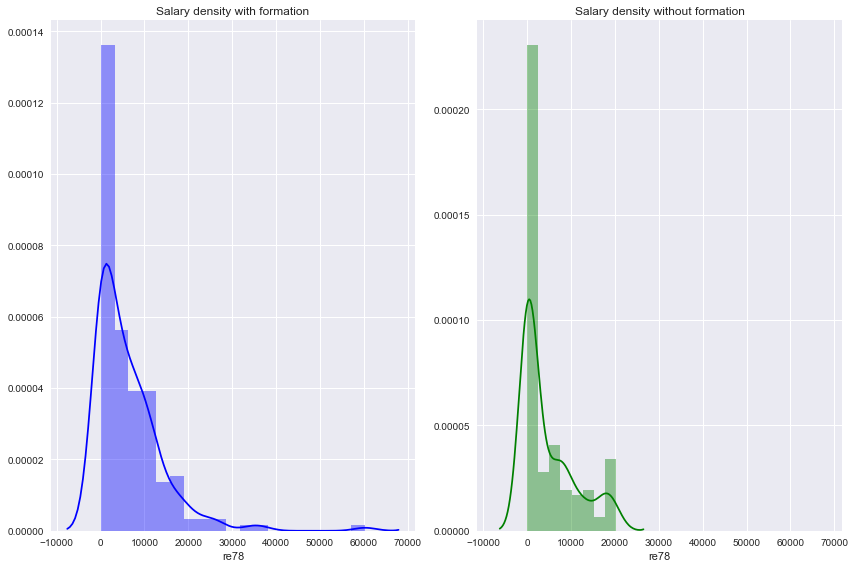

In [104]:
treated_res = matched[matched['treat'] == 1]['re78']
not_treated_res = matched[matched['treat'] == 0]['re78']

f, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
ax = axes[0]
ax.set_title("Salary density with formation")
sns.distplot(treated_res, color="b",  ax=ax);
ax = axes[1]
ax.set_title("Salary density without formation")
sns.distplot(not_treated_res, color="g", ax=ax);
plt.tight_layout()

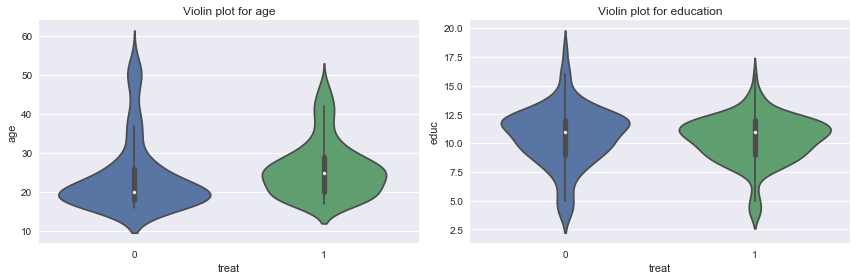

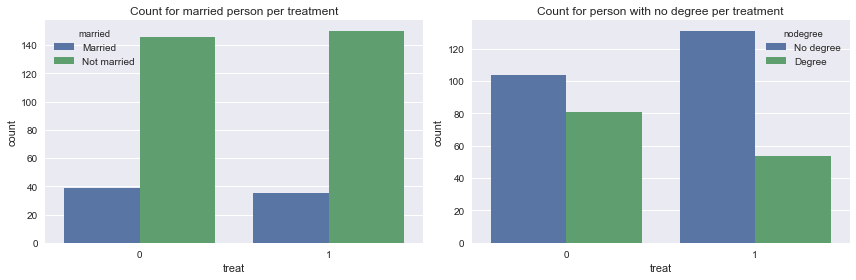

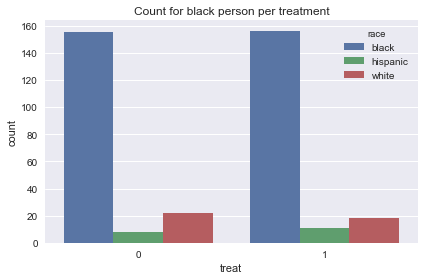

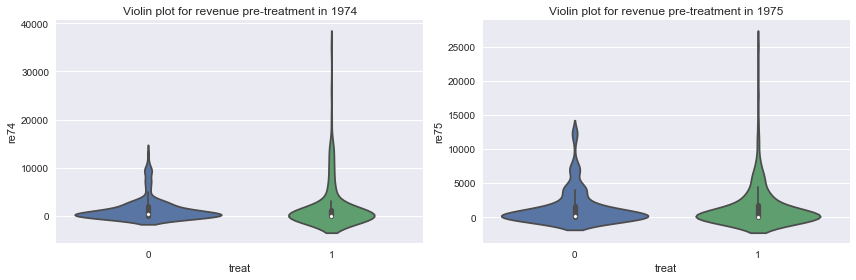

In [106]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].set_title("Violin plot for age")
sns.violinplot(x='treat', y='age', data=matched, ax=axes[0])
axes[1].set_title("Violin plot for education")
sns.violinplot(x='treat', y='educ', data=matched, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Count for married person per treatment")
sns.countplot(x='treat',hue='married', data=matched, ax=axes[0])
axes[1].set_title("Count for person with no degree per treatment")
sns.countplot(x='treat',hue='nodegree', data=matched, ax=axes[1])
plt.tight_layout()

fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.set_title("Count for black person per treatment")
sns.countplot(x='treat',hue='race', data=matched, ax=axes)
plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].set_title("Violin plot for revenue pre-treatment in 1974")
sns.violinplot(x='treat', y='re74', data=matched, ax=axes[0])
axes[1].set_title("Violin plot for revenue pre-treatment in 1975")
sns.violinplot(x='treat', y='re75', data=matched, ax=axes[1])
plt.tight_layout();